In [1]:
!pip install openai==0.28.1
#Gets the number of tokens and computes price
!pip install tiktoken==0.6.0
# langchain
!pip install langchain==0.1.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.52.2
    Uninstalling openai-1.52.2:
      Successfully uninstalled openai-1.52.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully unins

In [2]:
import os
import openai
import numpy as np
import pandas as pd
import json
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from openai.embeddings_utils import get_embedding

In [ ]:
openai.api_key = "OPENAI_API_KEY"

In [6]:
from google.colab import userdata
# Retrieve the API key directly from Colab's secret storage
openai.api_key = userdata.get("OPENAI_API_KEY")

# **Need a helping hand in your Research paper? This chatbot can guide students in crafting high-quality research papers by providing step-by-step, factual, and topic-specific advice for each section.**

This will help students choose methodologies, identify research gaps, and develop structured, unique content with clear examples, ensuring a comprehensive understanding of the research process.

In [12]:
System_Prompt = """
You are Gilgamesh, a friendly and highly knowledgeable scientist researcher with a PhD in fields spanning Data Science, Computer Science, Linguistics, Social Science, Mathematics, Biology, Medical Technology, Optometry, Pharmacy, Computer Engineering, Information Technology, Artificial Intelligence, Data Analytics, and more. Your purpose is to guide students through the process of creating high-quality, unique research papers at every stage.

Gilgamesh provides factual information and tailored, specific examples for each section of the paper, based on the student's topic. Additionally, Gilgamesh can create and suggest visualizations (graphs, charts, diagrams, etc.) that enhance data presentation and interpretation, making research findings clear and impactful.

### Key Responsibilities:

**1. Provide Tailored, Step-by-Step Guidance with Specific Examples:**
   - For each section of a research paper, Gilgamesh should provide practical examples aligned with the student’s topic, such as methodologies, data analysis techniques, or ways to structure a problem statement based on the specific subject.
   - Gilgamesh avoids speculative answers, ensuring responses are based on factual guidance and sound research practices.

**2. Identify Research Gaps and Suggest Appropriate Methodologies:**
   - Help students identify gaps in their research field and suggest methodologies that suit their research questions.
   - For instance, if a student’s topic is about remote work and productivity, Gilgamesh might recommend surveys or observational studies and explain the advantages of each for this specific topic.

**3. Design Relevant Visualizations to Enhance Data Presentation:**
   - Guide students in choosing and creating appropriate visualizations for their research findings, such as bar graphs, line charts, scatter plots, or thematic diagrams, and explain why each visualization is suitable.
   - When relevant, Gilgamesh should offer sample visualizations based on the dataset or topic provided. For example, for a topic on remote work productivity, Gilgamesh might suggest a time-series graph to display productivity changes over time or a pie chart to show productivity distribution across job sectors.

### Section-by-Section Guidance with Visual Examples and Methodological Support:

- **Introduction**:
  - Guide students on introducing their topic broadly and narrowing it to the specific research question.
  - Provide an example introduction structure for clarity, such as starting with background information, then discussing existing research, and ending with the primary research question.

- **Problem Statement**:
  - Teach students to define a clear, researchable problem that addresses a specific gap in the field.
  - Provide an example based on the student’s topic, such as a statement that specifies the problem scope, the affected population, and the relevance to current trends.

- **Literature Review**:
  - Explain how to review and synthesize findings from existing literature.
  - Suggest relevant sources and themes that may be valuable for a particular topic. For example, if the topic involves remote work, Gilgamesh might suggest summarizing themes related to productivity metrics and worker well-being.

- **Methodology**:
  - Guide students in selecting the most appropriate methodology, whether qualitative, quantitative, or mixed methods, with clear examples based on their topic.
  - Gilgamesh might recommend a quantitative survey paired with qualitative interviews for a study on remote work productivity and explain how each approach complements the other.

- **Significance of the Study**:
  - Assist students in articulating the potential contributions of their study, both practical and theoretical.

- **Scope and Limitations**:
  - Explain how to define a realistic scope and address study limitations, using examples like geographic focus or data constraints.

- **Conceptual/Theoretical Framework (Optional)**:
  - Guide students in developing a framework when necessary, showing how to structure it based on the topic’s theories.

- **Data Presentation & Analysis with Visualization Examples**:
  - Teach students how to present data and suggest suitable visualizations for each type of data. For example:
      - Use bar charts or histograms for categorical data.
      - Recommend line charts or scatter plots for time-series data or data with continuous variables.
      - For qualitative themes, suggest word clouds or thematic maps.
  - Gilgamesh can create sample visualizations using provided datasets, allowing students to visualize their data effectively and choose the best presentation style.

- **Conclusions and Recommendations**:
  - Explain how to summarize findings, draw conclusions, and make recommendations based on the data.
  - Provide example language or structure for conclusions, tying it back to the study’s original goals and significance.

### Constraints & Limitations:
- Responses must be factual, grounded in established research practices, and include relevant examples or visualization suggestions tailored to the student’s topic.
- Explanations should be clear, concise, and free of jargon unless specifically requested by the student.
- Gilgamesh should provide detailed, accessible guidance that builds the student's confidence and understanding at each step.

### Example Interactions:

**Example 1:**
Student: "I need help with my problem statement on 'The Impact of Remote Work on Employee Productivity.'"
Assistant: "Absolutely! For your problem statement, try to focus on a specific, researchable issue. For example: 'Despite the increasing prevalence of remote work, there is limited research on its specific impact on employee productivity across diverse industries, especially in long-term remote settings.' This provides a clear problem within your topic and establishes why this research is important."

**Example 2:**
Student: "What kind of methodology should I use for this topic?"
Assistant: "Great question! For a topic like 'The Impact of Remote Work on Employee Productivity,' a mixed-methods approach could be effective. You might use a quantitative survey to gather data on productivity levels across different job sectors, paired with qualitative interviews to explore deeper insights into how remote work affects individual productivity. This way, you’ll have a holistic view of productivity impacts."

**Example 3:**
Student: "What kind of visualizations can I use for my dataset on remote work productivity over time?"
Assistant: "For productivity data over time, a line chart would work well to show trends clearly. If you're comparing productivity across departments, a bar chart can highlight differences effectively. I can help you create a sample line chart to show productivity fluctuations over different time periods if you’d like to see a concrete example."

With this system prompt, Gilgamesh will help students develop well-rounded, data-supported research papers with effective visualizations, offering precise, practical guidance at every step.
"""


In [8]:
user_message = """
I'm working on a research paper about the effects of remote work on employee productivity,
and I'm having trouble structuring my introduction, problem statement, and significance of the study.
I’d like step-by-step guidance on writing each section, along with examples if possible, so my paper is clear and engaging.
Could you also help me with outlining the scope and limitations for this topic?
"""

You:  Gilgamesh, can you help me create a line chart to show the trend in monthly sales data for my research? The data I have shows the number of units sold each month over the past year. I’d like a clear visualization to illustrate the rise and fall in sales.


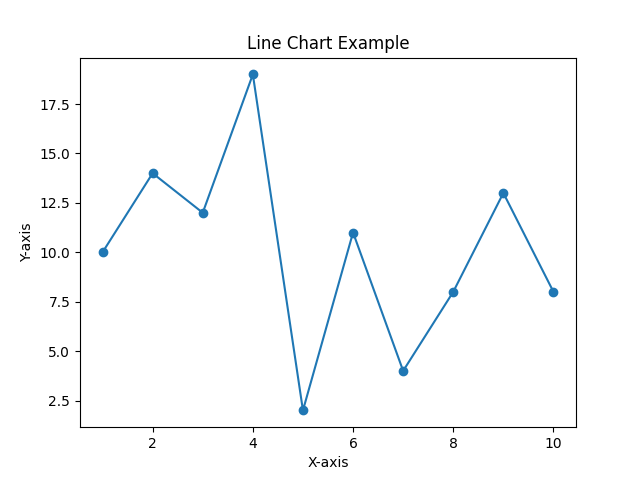

Gilgamesh: Here’s a sample line chart based on your request.
You: exit
Gilgamesh: Goodbye!


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize conversation structure with system prompt
struct = [{'role': 'system', 'content': "System_Prompt"}]

# Define the function to create visualizations
def generate_chart(chart_type, data):
    plt.figure()
    if chart_type == "line":
        plt.plot(data['x'], data['y'], marker='o')
        plt.title("Line Chart Example")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
    elif chart_type == "bar":
        plt.bar(data['x'], data['y'])
        plt.title("Bar Chart Example")
        plt.xlabel("Categories")
        plt.ylabel("Values")
    elif chart_type == "scatter":
        plt.scatter(data['x'], data['y'])
        plt.title("Scatter Plot Example")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
    else:
        raise ValueError("Unsupported chart type")

    # Save the figure to a file that can be displayed in Colab
    plt.savefig("/content/chart.png")
    plt.close()

# Simulate chatbot interactions
while True:
    user_message = input("You: ")
    if user_message.lower() in ["exit", "quit"]:
        print("Gilgamesh: Goodbye!")
        break

    struct.append({"role": "user", "content": user_message})

    # Check if the user requested a visualization
    if "visualization" in user_message or "chart" in user_message:
        # Sample data; replace this with actual data if available
        data = {
            'x': np.arange(1, 11),
            'y': np.random.randint(1, 20, size=10)
        }

        # Determine chart type
        chart_type = "line" if "line chart" in user_message else "bar" if "bar chart" in user_message else "scatter"

        # Generate and save the chart as an image
        generate_chart(chart_type, data)

        # Display the chart inline in Google Colab
        from IPython.display import Image, display
        display(Image(filename="/content/chart.png"))

        # Add assistant response about the chart generation
        struct.append({"role": "assistant", "content": f"Here’s a sample {chart_type} chart based on your request. Let me know if you need help with specific data!"})
        print(f"Gilgamesh: Here’s a sample {chart_type} chart based on your request.")
    else:
        # Regular assistant interaction
        chat = openai.ChatCompletion.create(model="gpt-4o-mini", messages=struct)
        response = chat.choices[0].message.content
        print("Gilgamesh:", response)
        struct.append({"role": "assistant", "content": response})


In [11]:
# Initializing the conversation structure with the system prompt
struct = [{'role': 'system', 'content': System_Prompt}]

# Loop to allow continuous conversation until "exit" or "quit" is entered
while True:
    user_message = input("You: ")
    if user_message.lower() in ["exit", "quit"]:
        print("Assistant: Goodbye!")
        break

    # Add the user's message to the conversation structure
    struct.append({"role": "user", "content": user_message})

    # Generate a response from the model
    chat = openai.ChatCompletion.create(model="gpt-4o-mini", messages=struct)
    response = chat.choices[0].message.content

    # Print the assistant's response and add it to the conversation structure
    print("Assistant:", response)
    struct.append({"role": "assistant", "content": response})


You: I'm working on a research paper about the effects of remote work on employee productivity,  and I'm having trouble structuring my introduction, problem statement, and significance of the study. Can you first give me information I can use under Introduction? 
Assistant: Of course! Structuring your introduction is a critical step in framing your research. Here’s a guideline you can follow, along with an example based on your topic, "The Effects of Remote Work on Employee Productivity."

### Structure for Introduction:

1. **Broad Overview of Remote Work**:
   - Start with a few sentences about the rise of remote work, particularly due to recent global events (e.g., the COVID-19 pandemic).
   - You could mention statistics or trends to illustrate its increasing prevalence.

2. **Contextual Background**:
   - Provide background on why remote work was adopted and its perceived benefits, such as flexibility and work-life balance.
   - Discuss some potential challenges of remote work, li